### IMAGE CLASSIFICATION ON CIFAR-10 DATA SET

Importing Libraries

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

Loading and Exploring the Data set

In [30]:
# Loading CIFAR-10 data set as train and test data
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

# Printing the shape of train and test data
print("\033[1;36m Printing the shape of train and test data set : \033[0m")
print(f"x_train -> {x_train.shape}")
print(f"y_train -> {y_train.shape}")
print(f"x_test -> {x_test.shape}")
print(f"y_test -> {y_test.shape}")

 Printing the shape of train and test data set : 
x_train -> (50000, 32, 32, 3)
y_train -> (50000, 1)
x_test -> (10000, 32, 32, 3)
y_test -> (10000, 1)


Data Visualization

C:\Users\Sheni Nevil\AppData\Local\Temp\ipykernel_10228\2434233884.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


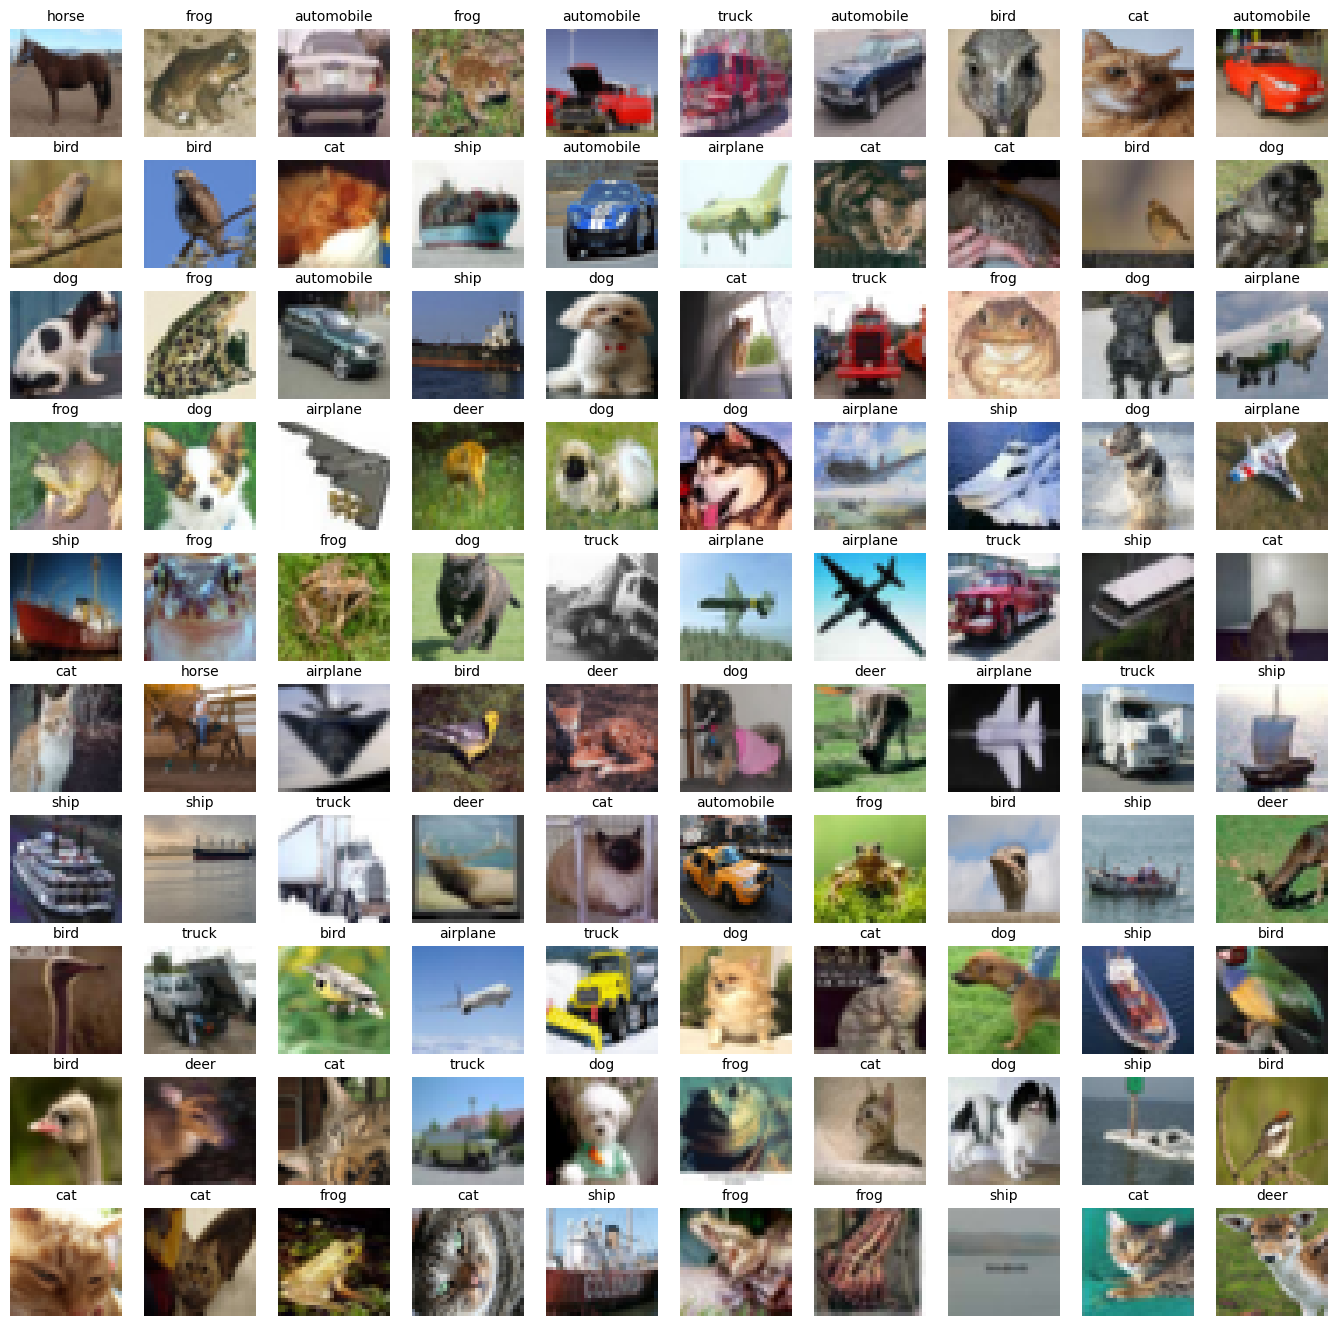

In [46]:
# Defining class labels of the CIFAR-10 data set
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Displaying a grid of 100 random images from training data
# Grid dimensions
W_grid,L_grid = 10,10
# subplot return the figure object and axes object(can be used to plot specific figures at various locations)
fig,axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

# Flattening the 15x15 matrix to 225 array for easy indexing
axes = axes.ravel()

# Displaying random images in a grid format
for i in np.arange(0,W_grid*L_grid):
    # Selecting a random number from 0 to length of x_train
    index = np.random.randint(0,len(x_train))
    # Displaying image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index],fontsize=10)
    axes[i].axis('off')
    
# Setting space between images
plt.subplots_adjust(hspace=0.01)

Data Preprocessing

In [48]:
# Scaling to normalize image pixel values to the range [0,1]
x_train = x_train/255.0
x_test = x_test/255.0

# Transforming labels to one-hot encoded format for categorical classification
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

Model Architecture (Convolutional Neural Network(CNN))

In [50]:
# Defining the CNN architecture model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Dropout layer
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Dropout layer
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# Dropout layer
model.add(Dropout(0.25))

# Flattening convolutional output to feed into fully connected layers
model.add(Flatten())
# Dense Layers
model.add(Dense(128,activation='relu'))
# Dropout layer
model.add(Dropout(0.25))

# Output layer with 10 classes
model.add(Dense(10,activation='softmax'))

# Compiling the model with metrics
m = ['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=m)

C:\Users\Sheni Nevil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Data Augmentation

In [52]:
# Setting up data augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_cat_train,batch_size)
steps_per_epoch = x_train.shape[0]//batch_size

# Training the model
r = model.fit(train_generator,epochs=10,steps_per_epoch=steps_per_epoch,validation_data=(x_test,y_cat_test))

Epoch 1/10


C:\Users\Sheni Nevil\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 133s 82ms/step - accuracy: 0.3373 - loss: 1.8681 - precision: 0.5069 - recall: 0.1248 - val_accuracy: 0.5767 - val_loss: 1.1686 - val_precision: 0.7166 - val_recall: 0.4338
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:45 106ms/step - accuracy: 0.5625 - loss: 1.0301 - precision: 0.7000 - recall: 0.4375

C:\Users\Sheni Nevil\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5625 - loss: 1.0301 - precision: 0.7000 - recall: 0.4375 - val_accuracy: 0.5766 - val_loss: 1.1674 - val_precision: 0.7144 - val_recall: 0.4374
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 167s 107ms/step - accuracy: 0.5449 - loss: 1.2800 - precision: 0.7112 - recall: 0.3706 - val_accuracy: 0.6454 - val_loss: 1.0214 - val_precision: 0.7560 - val_recall: 0.5378
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5625 - loss: 1.0986 - precision: 0.8571 - recall: 0.3750 - val_accuracy: 0.6403 - val_loss: 1.0424 - val_precision: 0.7488 - val_recall: 0.5358
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.6246 - loss: 1.0729 - precision: 0.7649 - recall: 0.4873 - val_accuracy: 0.6622 - val_loss: 0.9914 - val_precision: 0.7543 - val_recall: 0.5779
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6875 - loss: 0.9537 - precision: 0.7500 - recall: 0.5625 - val_accuracy: 0.6717 - val_l

Plotting Training Metrics

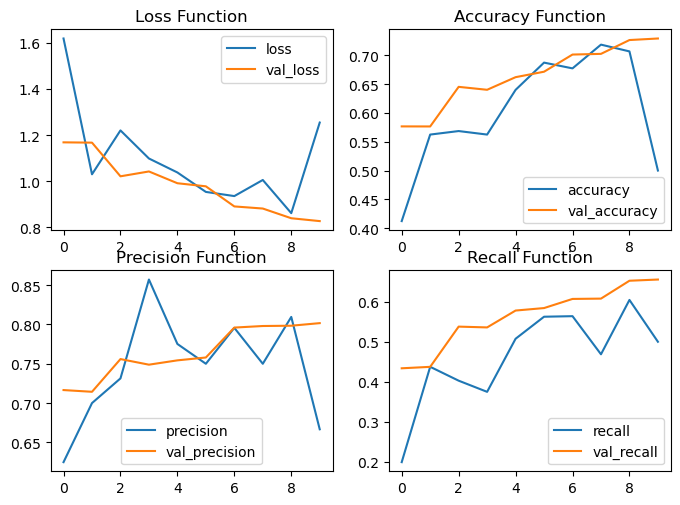

In [76]:
# Plotting training history for loss, accuracy, precision, and recall
plt.figure(figsize=(8,12))

plt.subplot(4,2,1)
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title('Loss Function')
plt.legend()

plt.subplot(4,2,2)
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy Function')
plt.legend()

plt.subplot(4,2,3)
plt.plot(r.history['precision'],label='precision')
plt.plot(r.history['val_precision'],label='val_precision')
plt.title('Precision Function')
plt.legend()

plt.subplot(4,2,4)
plt.plot(r.history['recall'],label='recall')
plt.plot(r.history['val_recall'],label='val_recall')
plt.title('Recall Function')
plt.legend()

Prediction and Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
 PLOT OF CONFUSION MATRIX : 


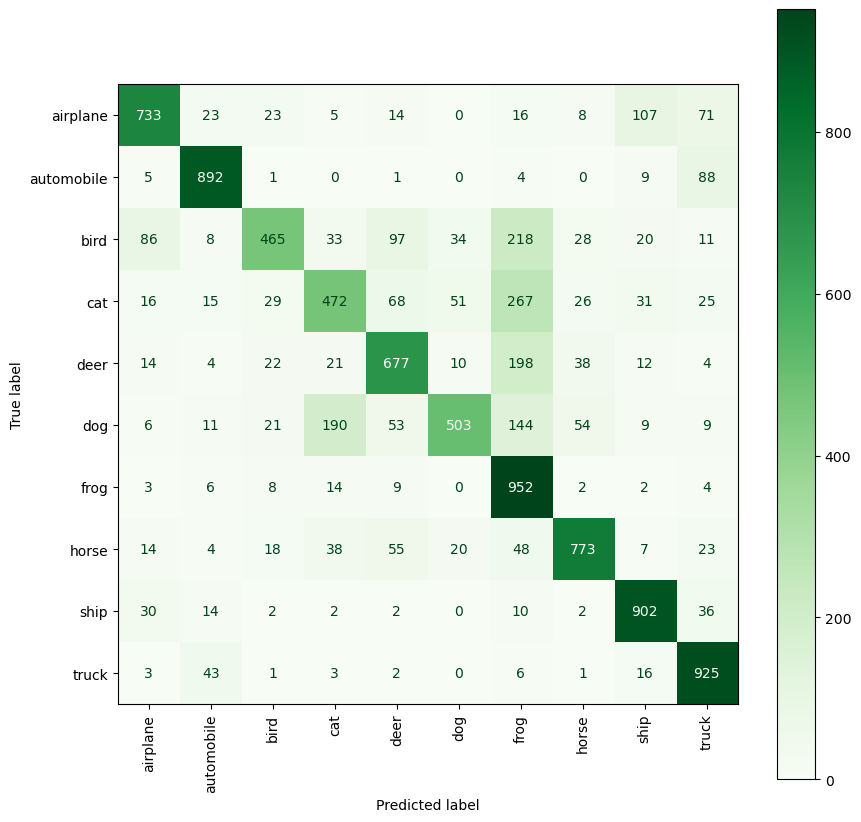

 Classification Report : 

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1000
           1       0.87      0.89      0.88      1000
           2       0.79      0.47      0.58      1000
           3       0.61      0.47      0.53      1000
           4       0.69      0.68      0.68      1000
           5       0.81      0.50      0.62      1000
           6       0.51      0.95      0.67      1000
           7       0.83      0.77      0.80      1000
           8       0.81      0.90      0.85      1000
           9       0.77      0.93      0.84      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.72     10000
weighted avg       0.75      0.73      0.72     10000



In [80]:
# Predicting labels for test data
y_pred = model.predict(x_test)
# Getting class with highest predicted probability
y_pred = np.argmax(y_pred,axis=1)

# Calculating confusion matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
disp = disp.plot(xticks_rotation='vertical',ax=ax,cmap='Greens')
print("\033[1;36m PLOT OF CONFUSION MATRIX : \033[0m")
plt.show()

# Printing classification report
print("\033[1;36m Classification Report : \033[0m\n")
print(classification_report(y_test, y_pred))